# **Muhammad Adeel - 2022331**

## TASK 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import time

In [ ]:
# transaction dataset
transactions = [
    ['coke', 'cheese', 'pizza'],
    ['coke', 'cheese'],
    ['coke', 'pizza'],
    ['cheese', 'pizza'],
    ['coke', 'cheese', 'pizza', 'ketchup'],
    ['coke', 'ketchup'],
    ['cheese', 'ketchup'],
    ['coke', 'cheese', 'ketchup']]

In [ ]:
#converting dataset into a DataFrame
items = sorted(set(item for transaction in transactions for item in transaction))
df = pd.DataFrame([{item: (item in transaction) for item in items} for transaction in transactions])

In [ ]:
df

,cheese,coke,ketchup,pizza
0,True,True,False,True
1,True,True,False,False
2,False,True,False,True
3,True,False,False,True
4,True,True,True,True
5,False,True,True,False
6,True,False,True,False
7,True,True,True,False


In [ ]:
def experiment_with_apriori(support_values):
    apriori_results = {}
    for min_support in support_values:
        start_time = time.time()
        # Generate frequent itemsets using Apriori
        frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        apriori_results[min_support] = {
            "rules": rules,
            "execution_time": time.time() - start_time
        }
    return apriori_results

In [ ]:
# Function to run FP-Growth with different thresholds
def experiment_with_fpgrowth(support_values):
    fpgrowth_results = {}
    for min_support in support_values:
        start_time = time.time()
        # Generate frequent itemsets using FP-Growth
        frequent_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
        # Generate association rules
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
        fpgrowth_results[min_support] = {
            "rules": rules,
            "execution_time": time.time() - start_time
        }
    return fpgrowth_results

In [ ]:
# Define support values to experiment with
support_values = [0.2, 0.3, 0.5]

In [ ]:
# Run experiments for both Apriori and FP-Growth
apriori_results = experiment_with_apriori(support_values)
fpgrowth_results = experiment_with_fpgrowth(support_values)

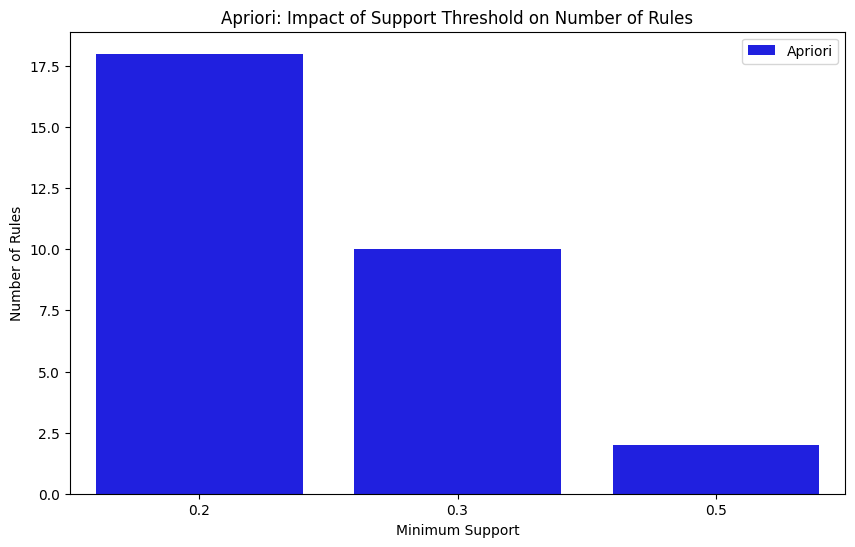

In [ ]:
# Visualizing the number of rules generated for Apriori at different thresholds
apriori_num_rules = [len(apriori_results[support]['rules']) for support in support_values]

plt.figure(figsize=(10, 6))
sns.barplot(x=support_values, y=apriori_num_rules, color="blue", label="Apriori")
plt.xlabel("Minimum Support")
plt.ylabel("Number of Rules")
plt.title("Apriori: Impact of Support Threshold on Number of Rules")
plt.legend()
plt.show()

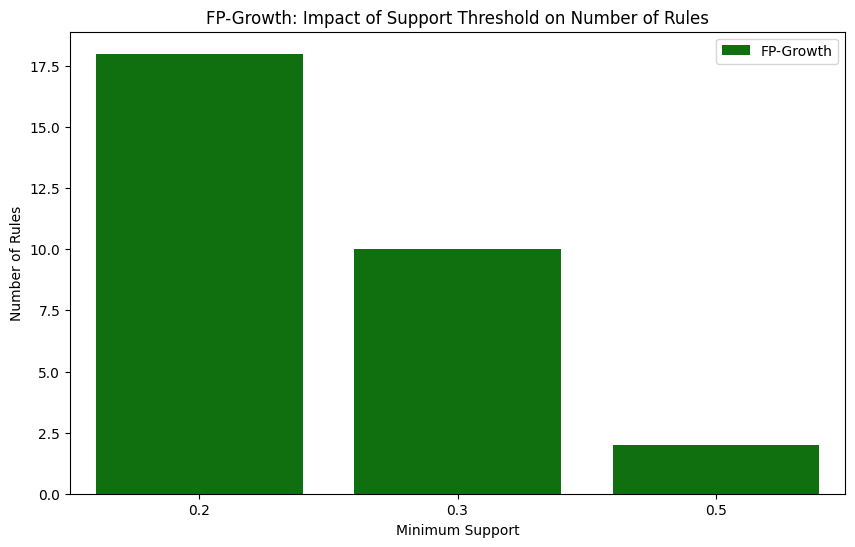

In [ ]:
# Visualizing the number of rules generated for FP-Growth at different thresholds
fpgrowth_num_rules = [len(fpgrowth_results[support]['rules']) for support in support_values]

plt.figure(figsize=(10, 6))
sns.barplot(x=support_values, y=fpgrowth_num_rules, color="green", label="FP-Growth")
plt.xlabel("Minimum Support")
plt.ylabel("Number of Rules")
plt.title("FP-Growth: Impact of Support Threshold on Number of Rules")
plt.legend()
plt.show()


In [ ]:
# Visualizing the execution time for both algorithms at different support values
apriori_times = [apriori_results[support]['execution_time'] for support in support_values]
fpgrowth_times = [fpgrowth_results[support]['execution_time'] for support in support_values]


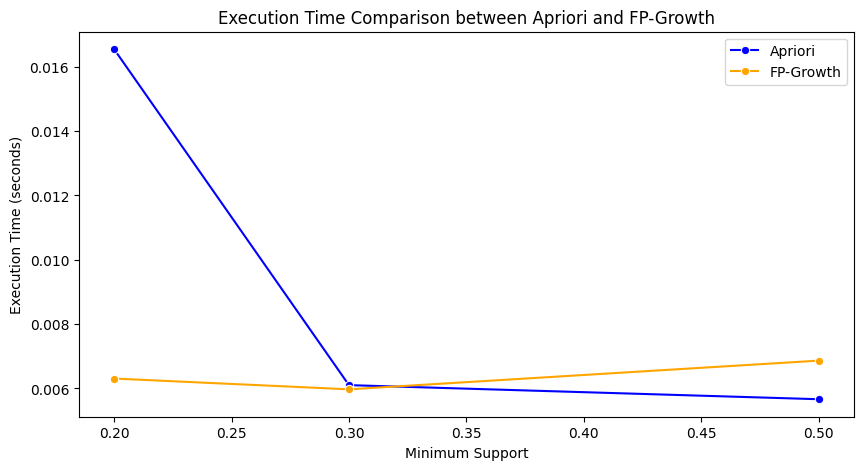

In [ ]:
# Visualizing execution times
exec_times_apriori = [exec_times[support]['Apriori'] for support in support_values]
exec_times_fpgrowth = [exec_times[support]['FP-Growth'] for support in support_values]

plt.figure(figsize=(10, 5))
sns.lineplot(x=support_values, y=exec_times_apriori, marker='o', label='Apriori', color='blue')
sns.lineplot(x=support_values, y=exec_times_fpgrowth, marker='o', label='FP-Growth', color='orange')
plt.xlabel("Minimum Support")
plt.ylabel("Execution Time (seconds)")
plt.title("Execution Time Comparison between Apriori and FP-Growth")
plt.legend()
plt.show()


## TASK 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import random

In [ ]:
# Define a list of possible food items
food_items = [
    "Burger", "Fries", "Coke", "Pizza", "Pasta", "Salad", "Nuggets",
    "Ice Cream", "Coffee", "Tea", "Hot Dog", "Sandwich", "Smoothie",
    "Taco", "Sushi", "Donut", "Milkshake", "Wrap", "Fried Chicken", "Muffin"
]

# Generate 500 transactions with random food item combinations
transactions = []
for _ in range(500):
    num_items = random.randint(2, 6)  # Each transaction has 2 to 6 items
    transaction = random.sample(food_items, num_items)
    transactions.append(transaction)

# Convert list of transactions into a DataFrame where each row is a transaction
df_transactions = pd.DataFrame(transactions)

# Save dataset as CSV file
file_path = "/content/sample_dataFastFood_Orders.csv"
df_transactions.to_csv(file_path, index=False, header=False)

print("Downloaded at: ",file_path)

Downloaded at:  /content/sample_dataFastFood_Orders.csv


In [ ]:
df = pd.read_csv("/content/sample_dataFastFood_Orders.csv", header=None)

In [ ]:
df.head(10)

,0,1,2,3,4,5
0,Wrap,Donut,Ice Cream,Fried Chicken,Burger,Sandwich
1,Pizza,Sushi,Muffin,Fried Chicken,NaN,NaN
2,Taco,Pizza,Ice Cream,Pasta,NaN,NaN
3,Muffin,Donut,NaN,NaN,NaN,NaN
4,Pizza,Wrap,Burger,Fries,Coke,NaN
5,Fried Chicken,Milkshake,Pizza,Hot Dog,Pasta,NaN
6,Wrap,Smoothie,Pasta,Muffin,Salad,NaN
7,Ice Cream,Tea,NaN,NaN,NaN,NaN
8,Wrap,Smoothie,Hot Dog,Burger,Salad,Muffin
9,Hot Dog,Milkshake,NaN,NaN,NaN,NaN


In [ ]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(df.shape[1]) if str(df.values[i, j]) != 'nan'])

# Print first 5 transactions
print(transactions[:10])

[['Wrap', 'Donut', 'Ice Cream', 'Fried Chicken', 'Burger', 'Sandwich'], ['Pizza', 'Sushi', 'Muffin', 'Fried Chicken'], ['Taco', 'Pizza', 'Ice Cream', 'Pasta'], ['Muffin', 'Donut'], ['Pizza', 'Wrap', 'Burger', 'Fries', 'Coke'], ['Fried Chicken', 'Milkshake', 'Pizza', 'Hot Dog', 'Pasta'], ['Wrap', 'Smoothie', 'Pasta', 'Muffin', 'Salad'], ['Ice Cream', 'Tea'], ['Wrap', 'Smoothie', 'Hot Dog', 'Burger', 'Salad', 'Muffin'], ['Hot Dog', 'Milkshake']]


In [ ]:
# Transform transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded

,Burger,Coffee,Coke,Donut,Fried Chicken,Fries,Hot Dog,Ice Cream,Milkshake,Muffin,Nuggets,Pasta,Pizza,Salad,Sandwich,Smoothie,Sushi,Taco,Tea,Wrap
0,True,False,False,True,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False
496,False,True,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False
497,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True
498,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False


In [ ]:
# Apply FP-Growth Algorithm to find frequent itemsets
min_support = 0.01  # Set a low minimum support value to capture more frequent itemsets
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)

# Print the frequent itemsets
print("\nFrequent Itemsets:\n")
frequent_itemsets.head(10)



Frequent Itemsets:



,support,itemsets
0,0.252,(Donut)
1,0.220,(Fried Chicken)
2,0.212,(Wrap)
3,0.210,(Burger)
4,0.206,(Sandwich)
5,0.204,(Ice Cream)
6,0.234,(Pizza)
7,0.188,(Muffin)
8,0.186,(Sushi)
9,0.230,(Taco)


In [ ]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Display the association rules
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))



Association Rules:
                  antecedents      consequents  support  confidence      lift
0           (Nuggets, Donut)  (Fried Chicken)    0.022    0.392857  1.785714
1   (Nuggets, Fried Chicken)          (Donut)    0.022    0.379310  1.505200
2     (Donut, Fried Chicken)        (Nuggets)    0.022    0.379310  1.708605
3     (Pizza, Fried Chicken)       (Smoothie)    0.016    0.347826  1.581028
4  (Smoothie, Fried Chicken)          (Pizza)    0.016    0.444444  1.899335
5                     (Wrap)          (Donut)    0.066    0.311321  1.235400
6      (Wrap, Fried Chicken)          (Donut)    0.016    0.533333  2.116402
7      (Wrap, Fried Chicken)          (Pizza)    0.010    0.333333  1.424501
8             (Pizza, Donut)           (Wrap)    0.016    0.400000  1.886792
9              (Pizza, Wrap)          (Donut)    0.016    0.347826  1.380262


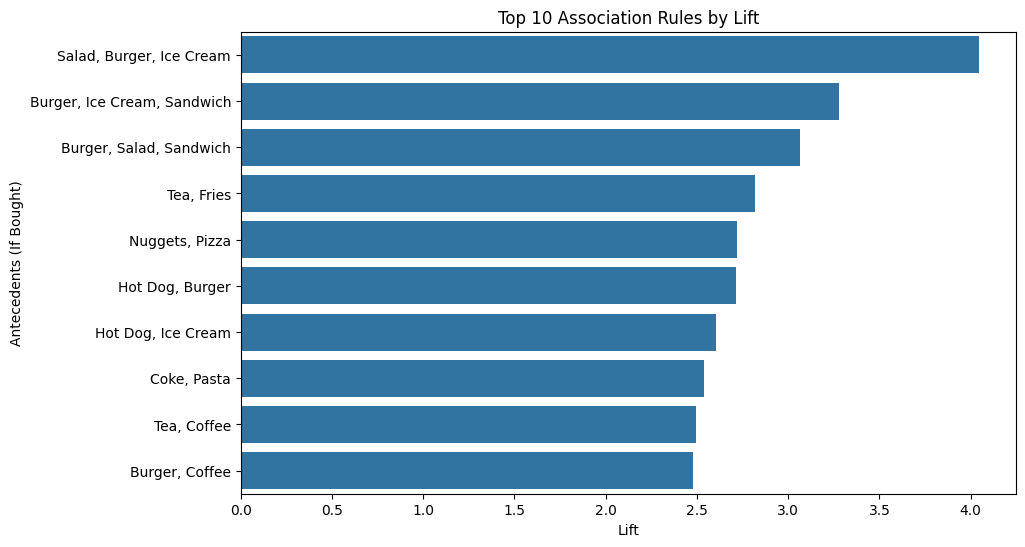

In [ ]:
# Sort rules by lift
rules = rules.sort_values(by="lift", ascending=False).head(10)

# Plot top 10 rules by lift
plt.figure(figsize=(10, 6))
sns.barplot(x=rules['lift'], y=rules['antecedents'].apply(lambda x: ', '.join(list(x))), errorbar=None)
plt.xlabel("Lift")
plt.ylabel("Antecedents (If Bought)")
plt.title("Top 10 Association Rules by Lift")
plt.show()


## TASK3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Define a list of possible food items
food_items = [
    "t-shirt", "jeans", "sneakers", "dress", "handbag", "sandals", "hoodie",
    "jogers", "flip-flops", "boots", "scarf", "cap", "blazer",
    "cap", "belt", "cargo pants", "heels", "tie", "sweatpants", "clutch"
]

# Generate 500 transactions with random food item combinations
transactions = []
for _ in range(500):
    num_items = random.randint(2, 7)  # Each transaction has 2 to 6 items
    transaction = random.sample(food_items, num_items)
    transactions.append(transaction)

# Convert list of transactions into a DataFrame where each row is a transaction
df_transactions = pd.DataFrame(transactions)

# Save dataset as CSV file
file_path = "/content/sample_data/Clothing_Orders.csv"
df_transactions.to_csv(file_path, index=False, header=False)

print("Downloaded at: ",file_path)

Downloaded at:  /content/sample_data/Clothing_Orders.csv


In [ ]:
df = pd.read_csv("/content/sample_data/Clothing_Orders.csv", header=None)
df.head(10)

,0,1,2,3,4,5,6
0,hoodie,dress,flip-flops,sweatpants,NaN,NaN,NaN
1,hoodie,handbag,NaN,NaN,NaN,NaN,NaN
2,handbag,heels,NaN,NaN,NaN,NaN,NaN
3,cap,belt,cargo pants,sandals,handbag,jeans,NaN
4,sweatpants,cap,NaN,NaN,NaN,NaN,NaN
5,flip-flops,jeans,boots,hoodie,dress,NaN,NaN
6,jeans,handbag,dress,cap,NaN,NaN,NaN
7,jeans,sweatpants,cap,hoodie,flip-flops,sneakers,NaN
8,scarf,sweatpants,blazer,heels,tie,sandals,handbag
9,t-shirt,jogers,dress,clutch,scarf,NaN,NaN


In [ ]:
transactions = []
for i in range(df.shape[0]):
    transactions.append([str(df.values[i, j]) for j in range(df.shape[1]) if str(df.values[i, j]) != 'nan'])

# Print first 5 transactions
print(transactions[:10])

[['hoodie', 'dress', 'flip-flops', 'sweatpants'], ['hoodie', 'handbag'], ['handbag', 'heels'], ['cap', 'belt', 'cargo pants', 'sandals', 'handbag', 'jeans'], ['sweatpants', 'cap'], ['flip-flops', 'jeans', 'boots', 'hoodie', 'dress'], ['jeans', 'handbag', 'dress', 'cap'], ['jeans', 'sweatpants', 'cap', 'hoodie', 'flip-flops', 'sneakers'], ['scarf', 'sweatpants', 'blazer', 'heels', 'tie', 'sandals', 'handbag'], ['t-shirt', 'jogers', 'dress', 'clutch', 'scarf']]


In [ ]:
# Transform transactions to one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display first few rows
df_encoded.head()

,belt,blazer,boots,cap,cargo pants,clutch,dress,flip-flops,handbag,heels,hoodie,jeans,jogers,sandals,scarf,sneakers,sweatpants,t-shirt,tie
0,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
3,True,False,False,True,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Apply FP-Growth Algorithm to find frequent itemsets with a minimum support threshold
min_support = 0.02  # Set support threshold (can adjust based on your dataset)
frequent_itemsets = fpgrowth(df_encoded, min_support=min_support, use_colnames=True)


In [ ]:
# Print the frequent itemsets
print("\nFrequent Itemsets:\n", frequent_itemsets.head(10))


Frequent Itemsets:
    support      itemsets
0    0.236      (hoodie)
1    0.236       (dress)
2    0.234  (sweatpants)
3    0.222  (flip-flops)
4    0.248     (handbag)
5    0.204       (heels)
6    0.410         (cap)
7    0.286     (sandals)
8    0.248       (jeans)
9    0.242        (belt)


In [ ]:
# Generate Association Rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)


In [ ]:
# Print the association rules (Antecedents, Consequents, Support, Confidence, and Lift)
print("\nAssociation Rules:\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Association Rules:
   antecedents consequents  support  confidence      lift
0    (hoodie)   (handbag)    0.052    0.220339  0.888464
1   (handbag)    (hoodie)    0.052    0.209677  0.888464
2    (hoodie)       (cap)    0.078    0.330508  0.806118
3      (belt)    (hoodie)    0.072    0.297521  1.260681
4    (hoodie)      (belt)    0.072    0.305085  1.260681
5   (sandals)    (hoodie)    0.066    0.230769  0.977836
6    (hoodie)   (sandals)    0.066    0.279661  0.977836
7   (t-shirt)    (hoodie)    0.064    0.260163  1.102384
8    (hoodie)   (t-shirt)    0.064    0.271186  1.102384
9    (hoodie)    (blazer)    0.058    0.245763  0.930919


In [ ]:
# Sort the rules by Lift to get the top associations
rules_sorted = rules.sort_values(by="lift", ascending=False).head(10)

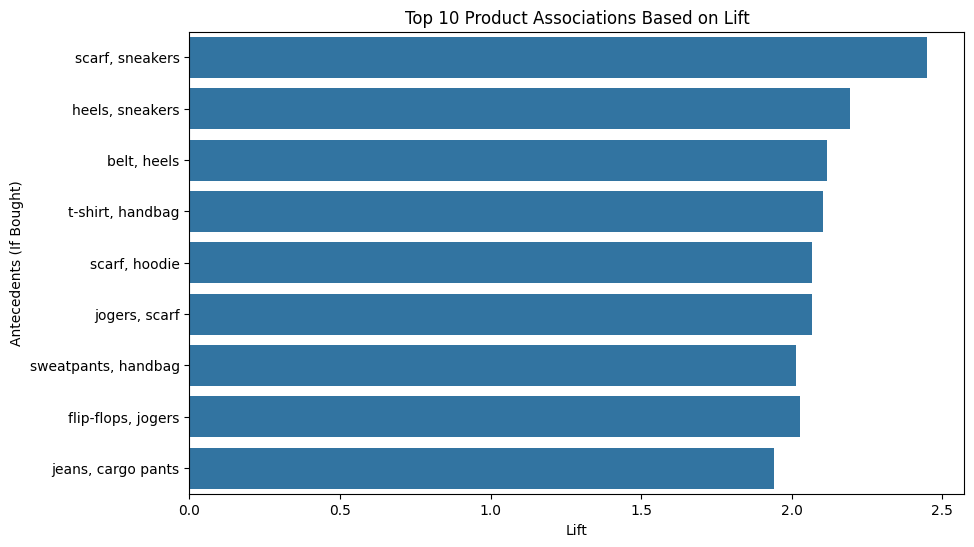

In [ ]:
# Plot the top 10 association rules based on Lift
plt.figure(figsize=(10,6))
sns.barplot(x=rules_sorted['lift'], y=rules_sorted['antecedents'].apply(lambda x: ', '.join(list(x))), errorbar=None)
plt.xlabel("Lift")
plt.ylabel("Antecedents (If Bought)")
plt.title("Top 10 Product Associations Based on Lift")
plt.show()

In [ ]:
# Check if rules exist and print top rules based on confidence
if not rules_sorted.empty:
    # Sort and display top rules based on confidence
    rules_sorted = rules.sort_values(by="confidence", ascending=False)
    print("\nTop Association Rules (sorted by confidence):\n")
    print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20))



Top Association Rules (sorted by confidence):

                 antecedents consequents  support  confidence      lift
320   (cargo pants, handbag)       (cap)    0.034    0.708333  1.727642
245           (heels, boots)       (cap)    0.026    0.684211  1.668806
371         (boots, handbag)       (cap)    0.026    0.619048  1.509872
233     (heels, cargo pants)       (cap)    0.024    0.600000  1.463415
443  (cargo pants, sneakers)       (cap)    0.024    0.571429  1.393728
588    (clutch, cargo pants)       (cap)    0.026    0.565217  1.378579
224      (heels, sweatpants)       (cap)    0.020    0.555556  1.355014
669          (jogers, jeans)       (cap)    0.022    0.550000  1.341463
396           (boots, scarf)       (cap)    0.024    0.545455  1.330377
436        (scarf, sneakers)       (cap)    0.024    0.545455  1.330377
248          (heels, jogers)       (cap)    0.028    0.538462  1.313321
127    (sweatpants, handbag)    (blazer)    0.030    0.535714  2.029221
558        (clut

In [ ]:
# Product Recommendation Insights:
print("\nWebsite Product Recommendations Based on Analysis:")
top_pairs = rules_sorted[['antecedents', 'consequents']].head(5)

# Print the top recommendations
for index, row in top_pairs.iterrows():
    print(f"Customers who buy {', '.join(row['antecedents'])} often buy {', '.join(row['consequents'])}. Recommend pairing these items!")


Website Product Recommendations Based on Analysis:
Customers who buy cargo pants, handbag often buy cap. Recommend pairing these items!
Customers who buy heels, boots often buy cap. Recommend pairing these items!
Customers who buy boots, handbag often buy cap. Recommend pairing these items!
Customers who buy heels, cargo pants often buy cap. Recommend pairing these items!
Customers who buy cargo pants, sneakers often buy cap. Recommend pairing these items!
